# Installation

In [1]:
!pip install lightgbm
!pip install eli5
!pip install shap
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install tqdm

  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\WintechSE1\AppData\Local\pip\Cache\wheels\2b\67\89\414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate


# Imports

In [1]:
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

# Data

In [2]:
data_dir = 'data/'

In [3]:
csvs = [x for x in os.listdir(data_dir) if x.endswith('.csv')]
print(csvs)
for csv in csvs:
    print(csv)
    df = pd.read_csv(os.path.join(data_dir, csv))
    print(len(df))
    print(list(df))

['ADMISSIONS.csv', 'CALLOUT.csv', 'CAREGIVERS.csv', 'CPTEVENTS.csv', 'DATETIMEEVENTS.csv', 'DIAGNOSES_ICD.csv', 'DRGCODES.csv', 'D_CPT.csv', 'D_ICD_DIAGNOSES.csv', 'D_ICD_PROCEDURES.csv', 'D_ITEMS.csv', 'D_LABITEMS.csv', 'ICUSTAYS.csv', 'INPUTEVENTS_CV.csv', 'INPUTEVENTS_MV.csv', 'LABEVENTS.csv', 'MICROBIOLOGYEVENTS.csv', 'NOTEEVENTS.csv', 'OUTPUTEVENTS.csv', 'PATIENTS.csv', 'PRESCRIPTIONS.csv', 'PROCEDUREEVENTS_MV.csv', 'PROCEDURES_ICD.csv', 'SERVICES.csv', 'TRANSFERS.csv']
ADMISSIONS.csv
58976
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA']
CALLOUT.csv
34499
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SUBMIT_WARDID', 'SUBMIT_CAREUNIT', 'CURR_WARDID', 'CURR_CAREUNIT', 'CALLOUT_WARDID', 'CALLOUT_SERVICE', 'REQUEST_TELE', 'REQUEST_RESP', 'REQUEST_CDIFF',

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,5,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


573146
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'COSTCENTER', 'CHARTDATE', 'CPT_CD', 'CPT_NUMBER', 'CPT_SUFFIX', 'TICKET_ID_SEQ', 'SECTIONHEADER', 'SUBSECTIONHEADER', 'DESCRIPTION']
DATETIMEEVENTS.csv


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4485937
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME', 'STORETIME', 'CGID', 'VALUE', 'VALUEUOM', 'WARNING', 'ERROR', 'RESULTSTATUS', 'STOPPED']
DIAGNOSES_ICD.csv
651047
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE']
DRGCODES.csv
125557
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'DRG_TYPE', 'DRG_CODE', 'DESCRIPTION', 'DRG_SEVERITY', 'DRG_MORTALITY']
D_CPT.csv
134
['ROW_ID', 'CATEGORY', 'SECTIONRANGE', 'SECTIONHEADER', 'SUBSECTIONRANGE', 'SUBSECTIONHEADER', 'CODESUFFIX', 'MINCODEINSUBSECTION', 'MAXCODEINSUBSECTION']
D_ICD_DIAGNOSES.csv
14567
['ROW_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']
D_ICD_PROCEDURES.csv
3882
['ROW_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']
D_ITEMS.csv
12487
['ROW_ID', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID']
D_LABITEMS.csv
753
['ROW_ID', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE']
ICUSTAYS.csv
61532
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID',

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7,9,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


17527935
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'CHARTTIME', 'ITEMID', 'AMOUNT', 'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID', 'ORDERID', 'LINKORDERID', 'STOPPED', 'NEWBOTTLE', 'ORIGINALAMOUNT', 'ORIGINALAMOUNTUOM', 'ORIGINALROUTE', 'ORIGINALRATE', 'ORIGINALRATEUOM', 'ORIGINALSITE']
INPUTEVENTS_MV.csv
3618991
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME', 'ITEMID', 'AMOUNT', 'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID', 'ORDERID', 'LINKORDERID', 'ORDERCATEGORYNAME', 'SECONDARYORDERCATEGORYNAME', 'ORDERCOMPONENTTYPEDESCRIPTION', 'ORDERCATEGORYDESCRIPTION', 'PATIENTWEIGHT', 'TOTALAMOUNT', 'TOTALAMOUNTUOM', 'ISOPENBAG', 'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION', 'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE', 'ORIGINALAMOUNT', 'ORIGINALRATE']
LABEVENTS.csv
27854055
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ITEMID', 'CHARTTIME', 'VALUE', 'VALUENUM', 'VALUEUOM', 'FLAG']
MICROBIOLOGYEVENTS.csv
631726
['ROW_ID', 'SUBJ

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2083180
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME', 'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT']
OUTPUTEVENTS.csv
4349218
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'CHARTTIME', 'ITEMID', 'VALUE', 'VALUEUOM', 'STORETIME', 'CGID', 'STOPPED', 'NEWBOTTLE', 'ISERROR']
PATIENTS.csv
46520
['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG']
PRESCRIPTIONS.csv


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4156450
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'STARTDATE', 'ENDDATE', 'DRUG_TYPE', 'DRUG', 'DRUG_NAME_POE', 'DRUG_NAME_GENERIC', 'FORMULARY_DRUG_CD', 'GSN', 'NDC', 'PROD_STRENGTH', 'DOSE_VAL_RX', 'DOSE_UNIT_RX', 'FORM_VAL_DISP', 'FORM_UNIT_DISP', 'ROUTE']
PROCEDUREEVENTS_MV.csv
258066
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME', 'ITEMID', 'VALUE', 'VALUEUOM', 'LOCATION', 'LOCATIONCATEGORY', 'STORETIME', 'CGID', 'ORDERID', 'LINKORDERID', 'ORDERCATEGORYNAME', 'SECONDARYORDERCATEGORYNAME', 'ORDERCATEGORYDESCRIPTION', 'ISOPENBAG', 'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION', 'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE']
PROCEDURES_ICD.csv
240095
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE']
SERVICES.csv
73343
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'TRANSFERTIME', 'PREV_SERVICE', 'CURR_SERVICE']
TRANSFERS.csv
261897
['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE', 'EVENTTYPE', 'PREV_CAREUNIT', 'CUR

In [3]:
for name in ['ADMISSIONS.csv', 'PATIENTS.csv', 'ICUSTAYS.csv', 'PROCEDURES_ICD.csv', 'DIAGNOSES_ICD.csv']:
    print(name)
    df = pd.read_csv(os.path.join(data_dir, name))
    print(len(df))
    try:
        print('SUBJECT_ID: ' + str(len(df['SUBJECT_ID'].values)))
        print('Unique SUBJECT_ID: ' + str(len(np.unique(df['SUBJECT_ID'].values))))
        print('HADM_ID: ' + str(len(df['HADM_ID'].values)))
        print('Unique HADM_ID: ' + str(len(np.unique(df['HADM_ID'].values))))
    except:
        pass
    print()

ADMISSIONS.csv
58976
SUBJECT_ID: 58976
Unique SUBJECT_ID: 46520
HADM_ID: 58976
Unique HADM_ID: 58976

PATIENTS.csv
46520
SUBJECT_ID: 46520
Unique SUBJECT_ID: 46520

ICUSTAYS.csv
61532
SUBJECT_ID: 61532
Unique SUBJECT_ID: 46476
HADM_ID: 61532
Unique HADM_ID: 57786

PROCEDURES_ICD.csv
240095
SUBJECT_ID: 240095
Unique SUBJECT_ID: 42214
HADM_ID: 240095
Unique HADM_ID: 52243

DIAGNOSES_ICD.csv
651047
SUBJECT_ID: 651047
Unique SUBJECT_ID: 46520
HADM_ID: 651047
Unique HADM_ID: 58976



In [94]:
diagnoses_df = pd.read_csv(os.path.join(data_dir, 'DIAGNOSES_ICD.csv'))
df_972 = diagnoses_df.loc[diagnoses_df.loc[:, 'ICD9_CODE'].str.contains('972.', na=False), :]
print(len(hadm_id_972))

df = pd.read_csv(os.path.join(data_dir, 'ADMISSIONS.csv'))
filtered_df = df.loc[df['HADM_ID'].isin(hadm_id_972)]
subject_ids = filtered_df['SUBJECT_ID'].values
hadm_ids = filtered_df['HADM_ID'].values

77


In [95]:
filtered_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
1971,1700,1382,183420,2187-09-28 19:22:00,2187-09-30 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Self Pay,NaN,NaN,SEPARATED,WHITE,2187-09-28 16:53:00,2187-09-28 22:13:00,OVERDOSE,0,1
3302,3161,2605,148903,2144-08-22 22:54:00,2144-08-24 16:24:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Medicaid,ENGL,UNOBTAINABLE,SINGLE,WHITE,2144-08-22 21:15:00,2144-08-23 01:10:00,OVERDOSE,0,1
3483,3762,3120,146449,2150-09-25 14:52:00,2150-09-28 16:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,SPAN,NOT SPECIFIED,SEPARATED,HISPANIC OR LATINO,2150-09-25 12:36:00,2150-09-25 16:10:00,RECURRENT SYMPTOMATIC BRADYCARDIA,0,1
4163,4442,3693,145182,2163-09-20 12:45:00,2163-09-21 16:30:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DISC-TRAN CANCER/CHLDRN H,Medicare,NaN,CATHOLIC,SINGLE,WHITE,2163-09-19 22:54:00,2163-09-20 03:37:00,DEPRESSION W/SUICIDIAL IDEATION,0,1
5622,5741,4745,151356,2126-08-06 02:45:00,2126-08-13 18:26:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Medicaid,ENGL,CATHOLIC,SINGLE,WHITE,2126-08-05 23:55:00,2126-08-06 05:02:00,MULTIPLE INGESTIONS,0,1
8039,5266,4346,114801,2129-07-17 17:12:00,2129-07-18 13:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,CATHOLIC,MARRIED,WHITE,2129-07-17 12:45:00,2129-07-17 19:10:00,OVERDOSE,0,1
8262,10017,8189,149399,2197-09-20 21:03:00,2197-09-22 20:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Private,NaN,UNOBTAINABLE,NaN,WHITE,2197-09-20 20:09:00,2197-09-20 22:13:00,POLYSUBSTANCE OVERDOSE,0,1
8335,5083,4187,199609,2198-12-27 20:43:00,2199-01-01 14:20:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,NaN,NaN,GI BLEED,0,1
11452,12442,10174,119127,2132-03-24 16:53:00,2132-03-27 11:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Government,NaN,CATHOLIC,SINGLE,WHITE,2132-03-24 12:34:00,2132-03-24 18:25:00,HYPOTENSION,0,1
11463,12453,10184,104042,2107-06-17 15:42:00,2107-06-27 14:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,JEWISH,MARRIED,WHITE,2107-06-17 13:26:00,2107-06-17 16:39:00,HYPOTENSION;BRADYCARDIA,0,1


In [96]:
# Add gender to the dataframe based on SUBJECT_ID.
patients_df = pd.read_csv(os.path.join(data_dir, 'PATIENTS.csv'))
gender_arr = []
for subject_id in subject_ids:
    gender_arr.append(patients_df.loc[patients_df['SUBJECT_ID'] == subject_id]['GENDER'].values[0])
print(list(zip(subject_ids, gender_arr))[:5])
print(patients_df.loc[patients_df['SUBJECT_ID'].isin(subject_ids[:5])])
filtered_df = filtered_df.assign(GENDER=gender_arr)
filtered_df

[(1382, 'M'), (2605, 'F'), (3120, 'M'), (3693, 'F'), (4745, 'F')]
      ROW_ID  SUBJECT_ID GENDER                  DOB  DOD DOD_HOSP DOD_SSN  \
931     1314        1382      M  2145-10-28 00:00:00  NaN      NaN     NaN   
2492    2468        2605      F  2111-02-11 00:00:00  NaN      NaN     NaN   
3482    2955        3120      M  2079-08-04 00:00:00  NaN      NaN     NaN   
5293    3491        3693      F  2117-01-17 00:00:00  NaN      NaN     NaN   
5556    4493        4745      F  2081-05-27 00:00:00  NaN      NaN     NaN   

      EXPIRE_FLAG  
931             0  
2492            0  
3482            0  
5293            0  
5556            0  


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER
1971,1700,1382,183420,2187-09-28 19:22:00,2187-09-30 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Self Pay,NaN,NaN,SEPARATED,WHITE,2187-09-28 16:53:00,2187-09-28 22:13:00,OVERDOSE,0,1,M
3302,3161,2605,148903,2144-08-22 22:54:00,2144-08-24 16:24:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Medicaid,ENGL,UNOBTAINABLE,SINGLE,WHITE,2144-08-22 21:15:00,2144-08-23 01:10:00,OVERDOSE,0,1,F
3483,3762,3120,146449,2150-09-25 14:52:00,2150-09-28 16:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,SPAN,NOT SPECIFIED,SEPARATED,HISPANIC OR LATINO,2150-09-25 12:36:00,2150-09-25 16:10:00,RECURRENT SYMPTOMATIC BRADYCARDIA,0,1,M
4163,4442,3693,145182,2163-09-20 12:45:00,2163-09-21 16:30:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DISC-TRAN CANCER/CHLDRN H,Medicare,NaN,CATHOLIC,SINGLE,WHITE,2163-09-19 22:54:00,2163-09-20 03:37:00,DEPRESSION W/SUICIDIAL IDEATION,0,1,F
5622,5741,4745,151356,2126-08-06 02:45:00,2126-08-13 18:26:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Medicaid,ENGL,CATHOLIC,SINGLE,WHITE,2126-08-05 23:55:00,2126-08-06 05:02:00,MULTIPLE INGESTIONS,0,1,F
8039,5266,4346,114801,2129-07-17 17:12:00,2129-07-18 13:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,CATHOLIC,MARRIED,WHITE,2129-07-17 12:45:00,2129-07-17 19:10:00,OVERDOSE,0,1,F
8262,10017,8189,149399,2197-09-20 21:03:00,2197-09-22 20:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Private,NaN,UNOBTAINABLE,NaN,WHITE,2197-09-20 20:09:00,2197-09-20 22:13:00,POLYSUBSTANCE OVERDOSE,0,1,F
8335,5083,4187,199609,2198-12-27 20:43:00,2199-01-01 14:20:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,NaN,NaN,GI BLEED,0,1,M
11452,12442,10174,119127,2132-03-24 16:53:00,2132-03-27 11:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Government,NaN,CATHOLIC,SINGLE,WHITE,2132-03-24 12:34:00,2132-03-24 18:25:00,HYPOTENSION,0,1,M
11463,12453,10184,104042,2107-06-17 15:42:00,2107-06-27 14:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,JEWISH,MARRIED,WHITE,2107-06-17 13:26:00,2107-06-17 16:39:00,HYPOTENSION;BRADYCARDIA,0,1,M


In [97]:
# Add DOB to the dataframe based on SUBJECT_ID.
dob_arr = []
for subject_id in subject_ids:
    dob_arr.append(patients_df.loc[patients_df['SUBJECT_ID'] == subject_id]['DOB'].values[0])
print(list(zip(subject_ids, dob_arr))[:5])
print(patients_df.loc[patients_df['SUBJECT_ID'].isin(subject_ids[:5])])
filtered_df = filtered_df.assign(DOB=dob_arr)
filtered_df

[(1382, '2145-10-28 00:00:00'), (2605, '2111-02-11 00:00:00'), (3120, '2079-08-04 00:00:00'), (3693, '2117-01-17 00:00:00'), (4745, '2081-05-27 00:00:00')]
      ROW_ID  SUBJECT_ID GENDER                  DOB  DOD DOD_HOSP DOD_SSN  \
931     1314        1382      M  2145-10-28 00:00:00  NaN      NaN     NaN   
2492    2468        2605      F  2111-02-11 00:00:00  NaN      NaN     NaN   
3482    2955        3120      M  2079-08-04 00:00:00  NaN      NaN     NaN   
5293    3491        3693      F  2117-01-17 00:00:00  NaN      NaN     NaN   
5556    4493        4745      F  2081-05-27 00:00:00  NaN      NaN     NaN   

      EXPIRE_FLAG  
931             0  
2492            0  
3482            0  
5293            0  
5556            0  


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER,DOB
1971,1700,1382,183420,2187-09-28 19:22:00,2187-09-30 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Self Pay,...,NaN,SEPARATED,WHITE,2187-09-28 16:53:00,2187-09-28 22:13:00,OVERDOSE,0,1,M,2145-10-28 00:00:00
3302,3161,2605,148903,2144-08-22 22:54:00,2144-08-24 16:24:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Medicaid,...,UNOBTAINABLE,SINGLE,WHITE,2144-08-22 21:15:00,2144-08-23 01:10:00,OVERDOSE,0,1,F,2111-02-11 00:00:00
3483,3762,3120,146449,2150-09-25 14:52:00,2150-09-28 16:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,NOT SPECIFIED,SEPARATED,HISPANIC OR LATINO,2150-09-25 12:36:00,2150-09-25 16:10:00,RECURRENT SYMPTOMATIC BRADYCARDIA,0,1,M,2079-08-04 00:00:00
4163,4442,3693,145182,2163-09-20 12:45:00,2163-09-21 16:30:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DISC-TRAN CANCER/CHLDRN H,Medicare,...,CATHOLIC,SINGLE,WHITE,2163-09-19 22:54:00,2163-09-20 03:37:00,DEPRESSION W/SUICIDIAL IDEATION,0,1,F,2117-01-17 00:00:00
5622,5741,4745,151356,2126-08-06 02:45:00,2126-08-13 18:26:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Medicaid,...,CATHOLIC,SINGLE,WHITE,2126-08-05 23:55:00,2126-08-06 05:02:00,MULTIPLE INGESTIONS,0,1,F,2081-05-27 00:00:00
8039,5266,4346,114801,2129-07-17 17:12:00,2129-07-18 13:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,CATHOLIC,MARRIED,WHITE,2129-07-17 12:45:00,2129-07-17 19:10:00,OVERDOSE,0,1,F,2090-07-13 00:00:00
8262,10017,8189,149399,2197-09-20 21:03:00,2197-09-22 20:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Private,...,UNOBTAINABLE,NaN,WHITE,2197-09-20 20:09:00,2197-09-20 22:13:00,POLYSUBSTANCE OVERDOSE,0,1,F,2179-03-05 00:00:00
8335,5083,4187,199609,2198-12-27 20:43:00,2199-01-01 14:20:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,PROTESTANT QUAKER,MARRIED,WHITE,NaN,NaN,GI BLEED,0,1,M,2148-06-18 00:00:00
11452,12442,10174,119127,2132-03-24 16:53:00,2132-03-27 11:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Government,...,CATHOLIC,SINGLE,WHITE,2132-03-24 12:34:00,2132-03-24 18:25:00,HYPOTENSION,0,1,M,2074-09-04 00:00:00
11463,12453,10184,104042,2107-06-17 15:42:00,2107-06-27 14:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,JEWISH,MARRIED,WHITE,2107-06-17 13:26:00,2107-06-17 16:39:00,HYPOTENSION;BRADYCARDIA,0,1,M,2024-04-24 00:00:00


In [98]:
# Add LOS to the dataframe based on HADM_ID.
icu_df = pd.read_csv(os.path.join(data_dir, 'ICUSTAYS.csv'))
los_arr = []
for hadm_id in hadm_ids:
    los = icu_df.loc[icu_df['HADM_ID'] == hadm_id]['LOS'].values
    if len(los) == 1:
        los_arr.append(los[0])
    else:
        los_arr.append(np.NaN)
print(list(zip(hadm_ids, los_arr))[:5])
print(icu_df.loc[icu_df['HADM_ID'].isin(hadm_ids[:5])])
filtered_df = filtered_df.assign(LOS=los_arr)

# Filter rows that are NaN in the new column.
filtered_df = filtered_df.dropna(subset=['LOS'])
subject_ids = filtered_df['SUBJECT_ID'].values
hadm_ids = filtered_df['HADM_ID'].values
filtered_df

[(183420, 0.9642), (148903, 1.8123), (146449, 1.9702), (145182, 1.0601), (151356, 4.5668)]
      ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID DBSOURCE FIRST_CAREUNIT  \
848     1773        1382   183420      267476  carevue           MICU   
3636    3293        2605   148903      252402  carevue           MICU   
3829    4646        3693   145182      285941  carevue           MICU   
4358    3931        3120   146449      267250  carevue           MICU   
5571    6000        4745   151356      288685  carevue            CCU   

     LAST_CAREUNIT  FIRST_WARDID  LAST_WARDID               INTIME  \
848           MICU            52           52  2187-09-28 19:23:17   
3636          MICU            52           52  2144-08-22 22:54:39   
3829          MICU            12           12  2163-09-20 15:09:02   
4358          MICU            50           50  2150-09-25 14:53:39   
5571          MICU             7           23  2126-08-06 02:46:15   

                  OUTTIME     LOS  
848   2187-09

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER,DOB,LOS
1971,1700,1382,183420,2187-09-28 19:22:00,2187-09-30 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Self Pay,...,SEPARATED,WHITE,2187-09-28 16:53:00,2187-09-28 22:13:00,OVERDOSE,0,1,M,2145-10-28 00:00:00,0.9642
3302,3161,2605,148903,2144-08-22 22:54:00,2144-08-24 16:24:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Medicaid,...,SINGLE,WHITE,2144-08-22 21:15:00,2144-08-23 01:10:00,OVERDOSE,0,1,F,2111-02-11 00:00:00,1.8123
3483,3762,3120,146449,2150-09-25 14:52:00,2150-09-28 16:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,SEPARATED,HISPANIC OR LATINO,2150-09-25 12:36:00,2150-09-25 16:10:00,RECURRENT SYMPTOMATIC BRADYCARDIA,0,1,M,2079-08-04 00:00:00,1.9702
4163,4442,3693,145182,2163-09-20 12:45:00,2163-09-21 16:30:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DISC-TRAN CANCER/CHLDRN H,Medicare,...,SINGLE,WHITE,2163-09-19 22:54:00,2163-09-20 03:37:00,DEPRESSION W/SUICIDIAL IDEATION,0,1,F,2117-01-17 00:00:00,1.0601
5622,5741,4745,151356,2126-08-06 02:45:00,2126-08-13 18:26:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Medicaid,...,SINGLE,WHITE,2126-08-05 23:55:00,2126-08-06 05:02:00,MULTIPLE INGESTIONS,0,1,F,2081-05-27 00:00:00,4.5668
8039,5266,4346,114801,2129-07-17 17:12:00,2129-07-18 13:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,MARRIED,WHITE,2129-07-17 12:45:00,2129-07-17 19:10:00,OVERDOSE,0,1,F,2090-07-13 00:00:00,0.8365
8262,10017,8189,149399,2197-09-20 21:03:00,2197-09-22 20:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Private,...,NaN,WHITE,2197-09-20 20:09:00,2197-09-20 22:13:00,POLYSUBSTANCE OVERDOSE,0,1,F,2179-03-05 00:00:00,0.8932
8335,5083,4187,199609,2198-12-27 20:43:00,2199-01-01 14:20:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,MARRIED,WHITE,NaN,NaN,GI BLEED,0,1,M,2148-06-18 00:00:00,1.8480
11452,12442,10174,119127,2132-03-24 16:53:00,2132-03-27 11:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Government,...,SINGLE,WHITE,2132-03-24 12:34:00,2132-03-24 18:25:00,HYPOTENSION,0,1,M,2074-09-04 00:00:00,0.8948
11463,12453,10184,104042,2107-06-17 15:42:00,2107-06-27 14:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,MARRIED,WHITE,2107-06-17 13:26:00,2107-06-17 16:39:00,HYPOTENSION;BRADYCARDIA,0,1,M,2024-04-24 00:00:00,4.3332


In [99]:
# Add ICD9 to the dataframe based on HADM_ID.
icd9_arr = []
for hadm_id in hadm_ids:
    icd9_arr.append(df_972.loc[df_972['HADM_ID'] == hadm_id]['ICD9_CODE'].values[0])
filtered_df = filtered_df.assign(ICD9_CODE=icd9_arr)
filtered_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER,DOB,LOS,ICD9_CODE
1971,1700,1382,183420,2187-09-28 19:22:00,2187-09-30 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Self Pay,...,WHITE,2187-09-28 16:53:00,2187-09-28 22:13:00,OVERDOSE,0,1,M,2145-10-28 00:00:00,0.9642,9726
3302,3161,2605,148903,2144-08-22 22:54:00,2144-08-24 16:24:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Medicaid,...,WHITE,2144-08-22 21:15:00,2144-08-23 01:10:00,OVERDOSE,0,1,F,2111-02-11 00:00:00,1.8123,9726
3483,3762,3120,146449,2150-09-25 14:52:00,2150-09-28 16:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,HISPANIC OR LATINO,2150-09-25 12:36:00,2150-09-25 16:10:00,RECURRENT SYMPTOMATIC BRADYCARDIA,0,1,M,2079-08-04 00:00:00,1.9702,9729
4163,4442,3693,145182,2163-09-20 12:45:00,2163-09-21 16:30:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DISC-TRAN CANCER/CHLDRN H,Medicare,...,WHITE,2163-09-19 22:54:00,2163-09-20 03:37:00,DEPRESSION W/SUICIDIAL IDEATION,0,1,F,2117-01-17 00:00:00,1.0601,9724
5622,5741,4745,151356,2126-08-06 02:45:00,2126-08-13 18:26:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Medicaid,...,WHITE,2126-08-05 23:55:00,2126-08-06 05:02:00,MULTIPLE INGESTIONS,0,1,F,2081-05-27 00:00:00,4.5668,9729
8039,5266,4346,114801,2129-07-17 17:12:00,2129-07-18 13:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,WHITE,2129-07-17 12:45:00,2129-07-17 19:10:00,OVERDOSE,0,1,F,2090-07-13 00:00:00,0.8365,9724
8262,10017,8189,149399,2197-09-20 21:03:00,2197-09-22 20:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Private,...,WHITE,2197-09-20 20:09:00,2197-09-20 22:13:00,POLYSUBSTANCE OVERDOSE,0,1,F,2179-03-05 00:00:00,0.8932,9720
8335,5083,4187,199609,2198-12-27 20:43:00,2199-01-01 14:20:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,WHITE,NaN,NaN,GI BLEED,0,1,M,2148-06-18 00:00:00,1.8480,9729
11452,12442,10174,119127,2132-03-24 16:53:00,2132-03-27 11:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Government,...,WHITE,2132-03-24 12:34:00,2132-03-24 18:25:00,HYPOTENSION,0,1,M,2074-09-04 00:00:00,0.8948,9724
11463,12453,10184,104042,2107-06-17 15:42:00,2107-06-27 14:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,WHITE,2107-06-17 13:26:00,2107-06-17 16:39:00,HYPOTENSION;BRADYCARDIA,0,1,M,2024-04-24 00:00:00,4.3332,9724


In [100]:
lab_df = pd.read_csv(os.path.join(data_dir, 'LABEVENTS.csv'))

In [145]:
# Add lab events to the dataframe based on HADM_ID.
events = []
for hadm_id in hadm_ids:
    events.extend(lab_df.loc[lab_df['HADM_ID'] == hadm_id]['ITEMID'].values)
print(list(set(events)))
values = {str(event): [] for event in events}
for hadm_id in hadm_ids:
    hadm_values = lab_df.loc[lab_df['HADM_ID'] == hadm_id]['ITEMID'].values
    for value in values:
        values[value].append(int(int(value) in hadm_values))
filtered_df = filtered_df.assign(**values)
filtered_df

[51200, 51213, 51214, 51216, 51218, 51221, 51222, 51233, 51237, 51240, 51243, 51244, 51245, 51246, 51248, 51249, 51250, 51251, 51252, 51254, 51255, 51256, 51257, 51260, 51261, 51263, 51505, 51265, 51266, 51267, 51268, 51269, 51274, 51275, 51276, 51277, 51279, 51283, 51284, 51287, 51001, 51288, 51294, 51296, 51297, 51300, 51301, 51513, 50800, 50801, 50802, 50803, 50804, 50805, 50806, 50808, 50809, 50810, 50811, 50812, 50813, 50814, 50815, 50816, 50817, 50818, 50819, 50820, 50821, 50822, 50823, 50824, 50825, 50826, 50827, 50828, 50835, 50849, 50852, 50853, 50856, 50861, 50862, 50863, 51373, 51375, 50866, 50867, 50868, 51376, 51377, 51379, 51382, 51383, 51384, 50878, 50879, 50880, 50882, 50883, 50884, 50885, 50887, 50889, 50893, 50895, 50896, 50899, 50902, 50903, 50904, 50905, 50907, 50908, 50909, 50910, 50911, 50912, 51419, 50915, 51427, 50917, 50919, 50920, 51431, 50922, 51434, 50924, 50925, 51436, 51438, 51439, 50930, 50931, 50933, 50935, 50940, 50941, 50943, 50946, 51462, 51463, 51464

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,50889,51288,51373,51375,51376,51377,51379,51382,51383,51384
1971,1700,1382,183420,2187-09-28 19:22:00,2187-09-30 17:00:00,0,EMERGENCY,3,HOME,Self Pay,...,0,0,0,0,0,0,0,0,0,0
3302,3161,2605,148903,2144-08-22 22:54:00,2144-08-24 16:24:00,0,EMERGENCY,3,DISCH-TRAN TO PSYCH HOSP,Medicaid,...,0,0,0,0,0,0,0,0,0,0
3483,3762,3120,146449,2150-09-25 14:52:00,2150-09-28 16:30:00,0,EMERGENCY,3,HOME,Medicare,...,0,0,0,0,0,0,0,0,0,0
4163,4442,3693,145182,2163-09-20 12:45:00,2163-09-21 16:30:00,0,EMERGENCY,0,DISC-TRAN CANCER/CHLDRN H,Medicare,...,0,0,0,0,0,0,0,0,0,0
5622,5741,4745,151356,2126-08-06 02:45:00,2126-08-13 18:26:00,0,EMERGENCY,3,DISCH-TRAN TO PSYCH HOSP,Medicaid,...,0,0,0,0,0,0,0,0,0,0
8039,5266,4346,114801,2129-07-17 17:12:00,2129-07-18 13:00:00,0,EMERGENCY,3,DISC-TRAN CANCER/CHLDRN H,Private,...,0,0,0,0,0,0,0,0,0,0
8262,10017,8189,149399,2197-09-20 21:03:00,2197-09-22 20:00:00,0,EMERGENCY,3,DISCH-TRAN TO PSYCH HOSP,Private,...,0,0,0,0,0,0,0,0,0,0
8335,5083,4187,199609,2198-12-27 20:43:00,2199-01-01 14:20:00,0,EMERGENCY,1,HOME HEALTH CARE,Medicare,...,0,0,0,0,0,0,0,0,0,0
11452,12442,10174,119127,2132-03-24 16:53:00,2132-03-27 11:15:00,0,EMERGENCY,3,HOME,Government,...,0,0,0,0,0,0,0,0,0,0
11463,12453,10184,104042,2107-06-17 15:42:00,2107-06-27 14:45:00,0,EMERGENCY,3,REHAB/DISTINCT PART HOSP,Medicare,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# chart_df = pd.read_csv(os.path.join(data_dir, 'CHARTEVENTS.csv'))

In [ ]:
# # Add chart events to the dataframe based on HADM_ID.
# events = []
# for hadm_id in hadm_ids:
#     events.extend(chart_df.loc[chart_df['HADM_ID'] == hadm_id]['ITEMID'].values)
# print(list(set(events)))
# values = {str(event): [] for event in events}
# for hadm_id in hadm_ids:
#     hadm_values = chart_df.loc[chart_df['HADM_ID'] == hadm_id]['ITEMID'].values
#     for value in values:
#         values[value].append(int(int(value) in hadm_values))
# filtered_df = filtered_df.assign(**values)
# filtered_df

# Modeling

In [63]:
import eli5
import lightgbm as lgb
import matplotlib.pyplot as plt
import shap
import sklearn

from sklearn.metrics import auc, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, KFold

In [54]:
def c_index(gt, pred, **kwargs):
    '''Faster implementation of c-stat.'''
    
    assert len(gt) == len(pred), \
        'Ground truth must have same size as predictions'
        
    gt_greater = np.greater.outer(gt, gt)
    pd_eq = np.equal.outer(pred, pred)
    pd_greater = np.greater.outer(pred, pred)
    
    pd_total = 0.5 * pd_eq + pd_greater
    
    n = np.sum(gt_greater)
    if n == 0:
        if 'throw_error' in kwargs:
            raise ValueError(f'All ground truth values equal to {gt[0]}')
        else:
            return 0
        
    result = np.sum(np.multiply(gt_greater, pd_total)) / n
    return result

In [107]:
k_folds = 5
num_trials = 100
confidence_level = 0.95
feature_maps = {}
for feature_name in ['ADMISSION_LOCATION', 'ETHNICITY', 'LANGUAGE', 'GENDER']:
    feature_maps[feature_name] = {value: i for i, value in enumerate(list(set(filtered_df[feature_name])))}
    filtered_df = filtered_df.replace(feature_maps[feature_name])
print(feature_maps)
filtered_df

{'ADMISSION_LOCATION': {'PHYS REFERRAL/NORMAL DELI': 0, 'TRANSFER FROM HOSP/EXTRAM': 1, 'CLINIC REFERRAL/PREMATURE': 2, 'EMERGENCY ROOM ADMIT': 3}, 'ETHNICITY': {'OTHER': 0, 'WHITE - RUSSIAN': 1, 'BLACK/AFRICAN AMERICAN': 2, 'BLACK/CAPE VERDEAN': 3, 'ASIAN': 4, 'WHITE': 5, 'UNABLE TO OBTAIN': 6, 'HISPANIC OR LATINO': 7, 'HISPANIC/LATINO - DOMINICAN': 8, 'UNKNOWN/NOT SPECIFIED': 9}, 'LANGUAGE': {nan: 0, 'CAPE': 1, 'ENGL': 2, 'SPAN': 3, 'RUSS': 4}, 'GENDER': {'M': 0, 'F': 1}}


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,50889,51288,51373,51375,51376,51377,51379,51382,51383,51384
1971,1700,1382,183420,2187-09-28 19:22:00,2187-09-30 17:00:00,0,EMERGENCY,3,HOME,Self Pay,...,0,0,0,0,0,0,0,0,0,0
3302,3161,2605,148903,2144-08-22 22:54:00,2144-08-24 16:24:00,0,EMERGENCY,3,DISCH-TRAN TO PSYCH HOSP,Medicaid,...,0,0,0,0,0,0,0,0,0,0
3483,3762,3120,146449,2150-09-25 14:52:00,2150-09-28 16:30:00,0,EMERGENCY,3,HOME,Medicare,...,0,0,0,0,0,0,0,0,0,0
4163,4442,3693,145182,2163-09-20 12:45:00,2163-09-21 16:30:00,0,EMERGENCY,0,DISC-TRAN CANCER/CHLDRN H,Medicare,...,0,0,0,0,0,0,0,0,0,0
5622,5741,4745,151356,2126-08-06 02:45:00,2126-08-13 18:26:00,0,EMERGENCY,3,DISCH-TRAN TO PSYCH HOSP,Medicaid,...,0,0,0,0,0,0,0,0,0,0
8039,5266,4346,114801,2129-07-17 17:12:00,2129-07-18 13:00:00,0,EMERGENCY,3,DISC-TRAN CANCER/CHLDRN H,Private,...,0,0,0,0,0,0,0,0,0,0
8262,10017,8189,149399,2197-09-20 21:03:00,2197-09-22 20:00:00,0,EMERGENCY,3,DISCH-TRAN TO PSYCH HOSP,Private,...,0,0,0,0,0,0,0,0,0,0
8335,5083,4187,199609,2198-12-27 20:43:00,2199-01-01 14:20:00,0,EMERGENCY,1,HOME HEALTH CARE,Medicare,...,0,0,0,0,0,0,0,0,0,0
11452,12442,10174,119127,2132-03-24 16:53:00,2132-03-27 11:15:00,0,EMERGENCY,3,HOME,Government,...,0,0,0,0,0,0,0,0,0,0
11463,12453,10184,104042,2107-06-17 15:42:00,2107-06-27 14:45:00,0,EMERGENCY,3,REHAB/DISTINCT PART HOSP,Medicare,...,0,0,0,0,0,0,0,0,0,0


In [136]:
def get_folds(target, use_item_features=False):
    input_features = ['ICD9_CODE', 'ADMISSION_LOCATION', 'ETHNICITY', 'LANGUAGE', 'GENDER']
    if use_item_features:
        input_features += [
            '51200', '51213', '51214', '51216', '51218', '51221', '51222', '51233', '51237', '51240',
            '51243', '51244', '51245', '51246', '51248', '51249', '51250', '51251', '51252', '51254',
            '51255', '51256', '51257', '51260', '51261', '51263', '51505', '51265', '51266', '51267',
            '51268', '51269', '51274', '51275', '51276', '51277', '51279', '51283', '51284', '51287',
            '51001', '51288', '51294', '51296', '51297', '51300', '51301', '51513', '50800', '50801',
            '50802', '50803', '50804', '50805', '50806', '50808', '50809', '50810', '50811', '50812',
            '50813', '50814', '50815', '50816', '50817', '50818', '50819', '50820', '50821', '50822',
            '50823', '50824', '50825', '50826', '50827', '50828', '50835', '50849', '50852', '50853',
            '50856', '50861', '50862', '50863', '51373', '51375', '50866', '50867', '50868', '51376',
            '51377', '51379', '51382', '51383', '51384', '50878', '50879', '50880', '50882', '50883',
            '50884', '50885', '50887', '50889', '50893', '50895', '50896', '50899', '50902', '50903',
            '50904', '50905', '50907', '50908', '50909', '50910', '50911', '50912', '51419', '50915',
            '51427', '50917', '50919', '50920', '51431', '50922', '51434', '50924', '50925', '51436',
            '51438', '51439', '50930', '50931', '50933', '50935', '50940', '50941', '50943', '50946',
            '51462', '51463', '51464', '50952', '51466', '50953', '50956', '50954', '50955', '50957',
            '50960', '51474', '50963', '51476', '50964', '51478', '51479', '50965', '50970', '50971',
            '51484', '51482', '51486', '51487', '50976', '50974', '50975', '51491', '51492', '51493',
            '50979', '50981', '50983', '51497', '51498', '50986', '51499', '51501', '50993', '51506',
            '50994', '51508', '50995', '50998', '50999', '51512', '51000', '51514', '51002', '51516',
            '51003', '51006', '51519', '51007', '51009', '51010', '51523', '51008', '51005', '51069',
            '51070', '51071', '51074', '51075', '51078', '51079', '51082', '51085', '51087', '51090',
            '51092', '51093', '51095', '51097', '51098', '51099', '51100', '51102', '51104', '51105',
            '51114', '51116', '51117', '51118', '51120', '51123', '51125', '51127', '51128', '51130',
            '51131', '51132', '51133', '51134', '51137', '51143', '51144', '51145', '51146', '51151',
            '51176', '51180', '51181', '51194', '51196', '51199']
    x_df = filtered_df[input_features]
    x = x_df.values
    x_names = list(x_df)
    print(x_names)
    print(x.shape)
    y_df = train_df[target]
    y = y_df.values
    print(y.shape)
    assert len(x) == len(y)
    try:
        folds = list(StratifiedKFold(k_folds).split(x, y))
    except:
        folds = list(KFold(k_folds).split(x, y))
    
    return x, x_names, folds

In [128]:
def train_model(folds, classification=True):
    model = lgb.LGBMClassifier(class_weight='balanced') if classification else lgb.LGBMRegressor(class_weight='balanced')

    ground_truth = np.zeros(x.shape[0])
    predictions = np.zeros(x.shape[0])
    shap_values = np.zeros(x.shape)
    shap_interaction_values = np.zeros(shape=(x.shape[0], x.shape[1], x.shape[1]))
    expected_values = []

    for train_ids, test_ids in folds:
        x_train = x[train_ids]
        y_train = y[train_ids]
        model.fit(x_train, y_train, feature_name=x_names)

        explanation = eli5.explain_weights_lightgbm(
            model, feature_names=x_names, top=25)
        print(eli5.format_as_text(explanation))

        x_test = x[test_ids]
        y_test = y[test_ids]
        y_pred = model.predict(x_test)

        ground_truth[test_ids] = y_test
        predictions[test_ids] = y_pred

        explainer = shap.TreeExplainer(model)
        shap_values[test_ids] = explainer.shap_values(x_test)
    #     shap_interaction_values[test_ids] = explainer.shap_interaction_values(x_test)
        expected_values.append(explainer.expected_value)

    # Bootstrapping to obtain confidence intervals.
    scores = []
    num_successes = 0
    num_tries = 0
    indices = list(range(len(ground_truth)))
    while (num_successes < num_trials):
        # Limit the number of tries.
        num_tries += 1
        if num_tries > 2 * num_trials:
            raise ValueError(
                "Too many unsuccessful tries to compute metric.")

        # Handle case where only one class is included by indices.
        try:
            new_indices = np.random.choice(indices, size=len(indices))
            score = c_index(
                ground_truth[new_indices], predictions[new_indices],
                throw_error=True)
            scores.append(score)
            num_successes += 1
        except:
            pass

    mean = np.mean(scores)
    scores.sort()
    # Computed using the basic bootstrap
    lower = 2 * mean - scores[
        int(((1 + confidence_level) / 2) * num_successes)]
    upper = 2 * mean - scores[
        int(((1 - confidence_level) / 2) * num_successes)]
    print(f'Lower bound: {lower}')
    print(f'Mean: {mean}')
    print(f'Upper bound: {upper}')

    cs = np.mean(cross_val_score(
        model, x, y, cv=folds, scoring=make_scorer(c_index, greater_is_better=True)))
    print(f'CV C-Stat: {cs}')
    
    return shap_values

## Predicting HOSPITAL_EXPIRE_FLAG

### Without lab+chart features

In [129]:
x, x_names, folds = get_folds('HOSPITAL_EXPIRE_FLAG')

['ICD9_CODE', 'ADMISSION_LOCATION', 'ETHNICITY', 'LANGUAGE', 'GENDER']
(68, 5)
(68,)


In [130]:
shap_values = train_model(folds)

Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.9356  GENDER
0.0644  ADMISSION_LOCATION
     0  LANGUAGE
     0  ETHNICITY
     0  ICD9_CODE
C extension was not built during install!
Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.5258  ICD9_CODE
0.3065  GENDER
0.1677  ADMISSION_LOCATION
     0  LANGUAGE
     0  ETHNICITY
C extension was not built during install!
Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.6432  GENDER
0.3471  ICD9_CODE
0.0097  ADMISSION_LOCATION
     0  LANGUAGE
     0  ETHNICITY
C extension was not built during install!
Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.6293  GENDER
0.3707  ICD9_CODE
     0  LANGUAGE
     0  ETHNICITY
     0  ADMISSION_LOCATION
C extension was no

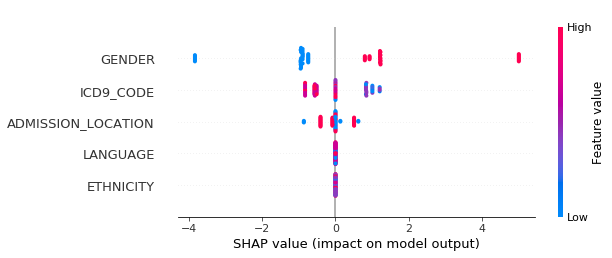

In [131]:
shap.summary_plot(shap_values, features=x, feature_names=x_names)

### With lab+chart features

In [ ]:
x, x_names, folds = get_folds('HOSPITAL_EXPIRE_FLAG', use_item_features=True)

In [133]:
shap_values = train_model(folds)

Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.3714  GENDER
0.2022  50808
0.1780  50822
0.1538  50911
0.0376  ADMISSION_LOCATION
0.0301  50993
0.0269  50816
     0  50868
     0  50817
     0  50826
     0  50818
     0  51375
     0  51373
     0  50863
     0  50862
     0  50861
     0  50866
     0  50856
     0  50853
     0  50852
     0  50849
     0  50835
     0  50828
     0  50867
     0  50815
       … 226 more …       
C extension was not built during install!
Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.5189  50809
0.1531  GENDER
0.1049  ICD9_CODE
0.0987  50808
0.0808  51071
0.0227  ADMISSION_LOCATION
0.0096  51478
0.0049  50856
0.0041  50816
0.0023  50993
     0  51375
     0  51373
     0  50863
     0  50819
     0  50853
     0  50852
     0  50849
     0  50826
     0  50815
     0  50827
     0  50820
     0  50818
   

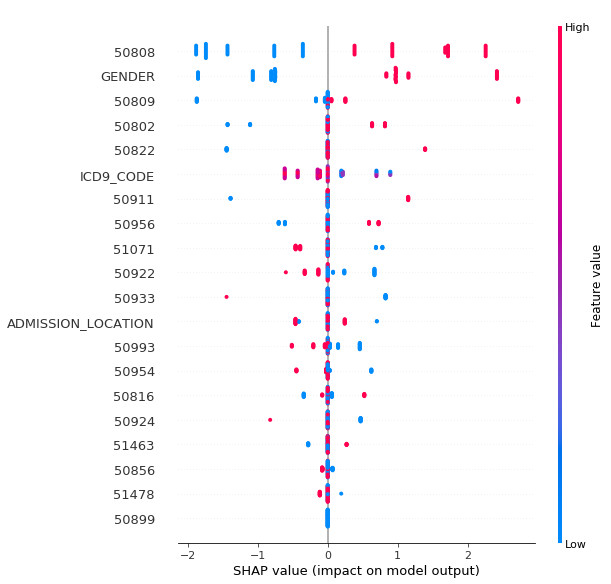

In [134]:
shap.summary_plot(shap_values, features=x, feature_names=x_names)

## Predicting LOS

### Without lab+chart features

In [137]:
x, x_names, folds = get_folds('LOS')

['ICD9_CODE', 'ADMISSION_LOCATION', 'ETHNICITY', 'LANGUAGE', 'GENDER']
(68, 5)
(68,)


In [140]:
shap_values = train_model(folds, classification=False)

Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.6525  GENDER
0.3472  ICD9_CODE
0.0003  ADMISSION_LOCATION
     0  LANGUAGE
     0  ETHNICITY
C extension was not built during install!
Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.6348  GENDER
0.3626  ICD9_CODE
0.0025  ADMISSION_LOCATION
     0  LANGUAGE
     0  ETHNICITY
C extension was not built during install!
Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.6023  ICD9_CODE
0.3904  GENDER
0.0073  ADMISSION_LOCATION
     0  LANGUAGE
     0  ETHNICITY
C extension was not built during install!
Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

1.0000  GENDER
     0  LANGUAGE
     0  ETHNICITY
     0  ADMISSION_LOCATION
     0  ICD9_CODE
C extension was no

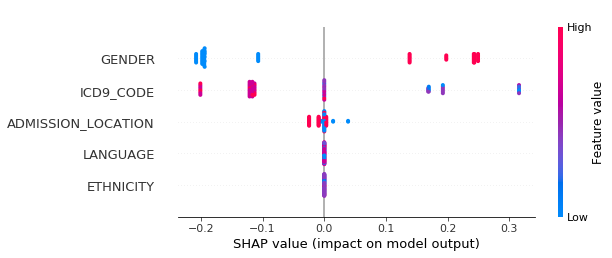

In [141]:
shap.summary_plot(shap_values, features=x, feature_names=x_names)

### With lab+chart features

In [142]:
x, x_names, folds = get_folds('LOS', use_item_features=True)

['ICD9_CODE', 'ADMISSION_LOCATION', 'ETHNICITY', 'LANGUAGE', 'GENDER', '51200', '51213', '51214', '51216', '51218', '51221', '51222', '51233', '51237', '51240', '51243', '51244', '51245', '51246', '51248', '51249', '51250', '51251', '51252', '51254', '51255', '51256', '51257', '51260', '51261', '51263', '51505', '51265', '51266', '51267', '51268', '51269', '51274', '51275', '51276', '51277', '51279', '51283', '51284', '51287', '51001', '51288', '51294', '51296', '51297', '51300', '51301', '51513', '50800', '50801', '50802', '50803', '50804', '50805', '50806', '50808', '50809', '50810', '50811', '50812', '50813', '50814', '50815', '50816', '50817', '50818', '50819', '50820', '50821', '50822', '50823', '50824', '50825', '50826', '50827', '50828', '50835', '50849', '50852', '50853', '50856', '50861', '50862', '50863', '51373', '51375', '50866', '50867', '50868', '51376', '51377', '51379', '51382', '51383', '51384', '50878', '50879', '50880', '50882', '50883', '50884', '50885', '50887', '5

In [143]:
shap_values = train_model(folds, classification=False)

Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.6095  50808
0.1923  GENDER
0.1038  ICD9_CODE
0.0382  50809
0.0142  50922
0.0112  50956
0.0095  50981
0.0089  50911
0.0062  50816
0.0051  50824
0.0011  50993
     0  50819
     0  51373
     0  50835
     0  50861
     0  50856
     0  50853
     0  50852
     0  50849
     0  50866
     0  50818
     0  50827
     0  50817
     0  50862
     0  50863
  … 226 more …   
C extension was not built during install!
Explained as: feature importances

LightGBM feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.5893  50808
0.2054  GENDER
0.1057  50809
0.0354  50956
0.0340  ICD9_CODE
0.0093  50922
0.0073  50911
0.0061  50981
0.0057  51464
0.0008  50954
0.0007  50856
0.0004  50822
     0  50852
     0  50861
     0  50849
     0  50835
     0  50862
     0  50863
     0  50866
     0  50827
     0  50818
     0  50816
     0  51373
     0  50853
     0

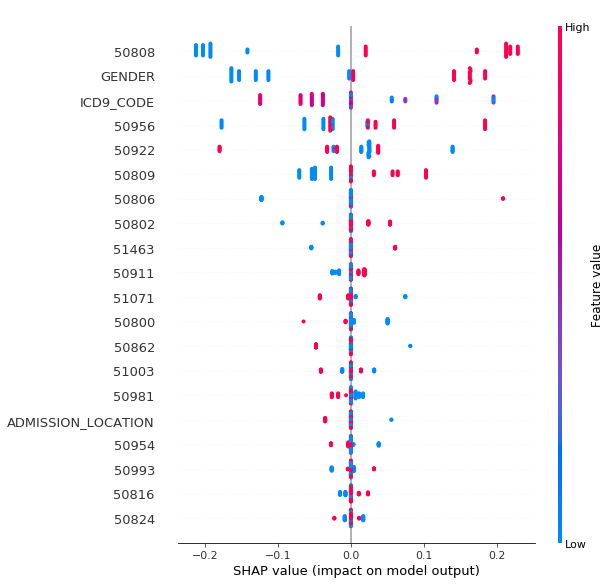

In [144]:
shap.summary_plot(shap_values, features=x, feature_names=x_names)